<center><h1 class="list-group-item list-group-item-success">Twitter Sentiment Analysis</h1></center>

<div style="background:#c72e57;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 4>Problem Statement</font></h4>
    </strong>
</div><br>
<font size = 3.9 color = "brown">Clasifique los tweets implementando cualquier enfoque de NLP para el análisis de sentimiento en el conjunto de datos proporcionado. El objetivo es reconocer si el tweet dado está orientado como tono negativo (-1), neutral (0) o positivo (1). Concéntrese principalmente en técnicas únicas de preprocesamiento.</font>

<font size = 3.9 color = "brown">El repositorio esta en Kaggle en el siguiente link: https://www.kaggle.com/c/twitter-sentiment-analysis2</font>





<div style="background:#c72e57;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 4>Context</font></h4>
    </strong>
</div><br>
<font size = 3.9 color = "brown">Sentiment analysis studies the subjective information in an expression, that is, the opinions, appraisals, emotions, or attitudes towards a topic, person or entity.The dataset has three sentiments namely, negative(-1), neutral(0), and positive(+1).</font>

<div style="background:#c72e57;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 4>Data Overview</font></h4>
    </strong>
</div><br>
<font size = 3.5 color = "brown">The dataset contains information about<br><br>
    <font color = "red">
        <ol>
    <li>Tweet - Message Tweeted</li><br>
    <li>label - Sentiment for the tweet</li>
        </ol>
    </font>
</font>


<div style="background:#c72e57;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 4>Contents</font></h4>
    </strong>
</div>
<font size = 3.5 color = "blue">
    <ol>
    <br><br><li>Importing Packages</li><br>
    <li>Importing Data</li><br>
    <li>Analysing Data</li><br>
        <ol> <font color = "red">
            <li> Data Overview</li>
            <li> Checking for NA</li>
            <li> Finding out Distribution of different sentiments </li>
            </font></ol><br>
    <li>Data Visualization</li><br>
        <ol> <font color = "red">
            <li> Distribution of different sentiments</li>
            <li> Word cloud on different sentiments</li>
            </font></ol><br>
    <li>Data Preprocessing</li><br>
        <ol> <font color = "red">
            <li> Tokenization</li>
            <li> Removing unnecessary punctuation, tags</li>
            <li>Converting all letters to lower case</li>
            <li>Stemming</li>
            </font></ol><br>
    <li>Feature Extraction</li><br>
         <ol> <font color = "red">
            <li> Bag of words</li>
            <li> TF-IDF Vectorizer</li>
            </font></ol><br>
    <li>Training Models</li><br>
         <ol> <font color = "red">
            <li>Naive Bayes</li>
            <li>Logistic Regression</li>
            </font></ol><br>
    <li>Evaluation Metrics</li><br>
    <li>Sequential Modelling</li><br>
    <li>Predictions</li><br>
    </ol>
</font>

<div style="background:#c72e57;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 4>1. Importing Packages</font></h4>
    </strong>
</div>

In [4]:
# Importamos los paquetes
import warnings

warnings.filterwarnings("ignore") 
import re
import urllib.request

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
from sklearn.feature_extraction.text import (CountVectorizer,
                                             HashingVectorizer,
                                             TfidfVectorizer)
from sklearn.model_selection import train_test_split
from wordcloud import STOPWORDS, ImageColorGenerator, WordCloud

nltk.download('stopwords', quiet=True)
from gensim.models import Word2Vec
import imblearn
from imblearn import under_sampling
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.linear_model import (LogisticRegression,
                                  PassiveAggressiveClassifier)
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix)
from sklearn.naive_bayes import GaussianNB, MultinomialNB

from tensorflow import keras
from tensorflow.keras.layers import (LSTM, Bidirectional, Dense, Dropout,
                                     Embedding, Input, SpatialDropout1D)
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot

<div style="background:#c72e57;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 4>2. Importing Data</font></h4>
    </strong>
</div>

In [7]:
# Leemos los datos
df = pd.read_csv('C:/Users/Usuario/Archivos en Jupyter/Sentiment Analysis/Twitter_Data.csv')


<div style="background:#c72e57;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 4>3. Analysing Data</font></h4>
    </strong>
</div>


In [8]:
# Ejemplo de los datos
df.sample(5)

,clean_text,category
43636,asat focused primarily the development systems...,1.0
52056,years after attained capability neutralize sat...,0.0
151262,when suddenly that boy said modi best and then...,1.0
1571,doval has such tremendous record but because m...,-1.0
122597,swine its your paymasters across the border th...,1.0


In [9]:
# Chequeamos para los valores NA
df.isnull().sum()

clean_text    4
category      7
dtype: int64

<font color = "brown" size = 4> Valores muy inferiores a NA😊. podemos eliminarlos</font>

In [10]:
# Distribución de diferentes clases en el sentimiento
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=["Total","Percentage"])
count_values_in_column(df,"category")

,Total,Percentage
1.0,72250,44.33
0.0,55213,33.88
-1.0,35510,21.79
NaN,7,0.00


## Insights
<font color = "brown" size = 4><ul>
    <li>En este dato tenemos más del 40% de tuits positivos</li>
    <li>Los tweets negativos tienen números bajos y solo se cuentan el 50 % en comparación con los tweets positivos.</li>
    <li>Los tweets neutrales tienen un buen número en total entre el recuento de tweets positivos y negativos</li></ul>
</font>

In [11]:
# Segrating based on different sentiments
df_negative = df[df["category"]==-1]
df_positive = df[df["category"]==1]
df_neutral = df[df["category"]==0]

<div style="background:#c72e57;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 4>4. Data Visualization</font></h4>
    </strong>
</div>


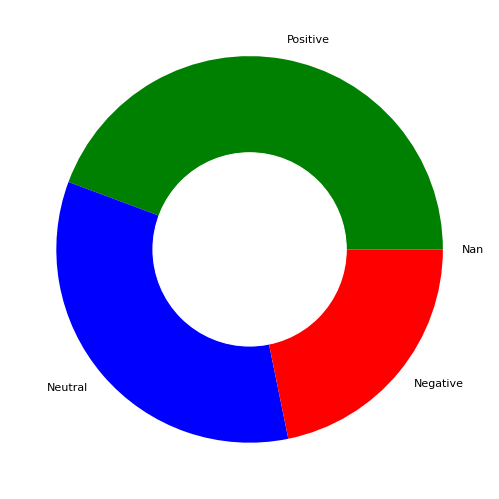

In [12]:
# crear datos para gráfico circular
plt.figure(figsize=(13, 8), dpi=80)
pichart = count_values_in_column(df,"category")
names= ["Positive","Neutral","Negative","Nan"]
size=pichart["Percentage"]
 
# Crear un circulo para el centro de la gráfica
my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(size, labels=names, colors=['green','blue','red',"yellow"])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


In [13]:
# Función para Crear Wordcloud
def create_wordcloud(text,path):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
    max_words=3000,
    stopwords=stopwords,
    random_state=42,
    width=900, height=500,
    repeat=True)
    wc.generate(str(text))
    wc.to_file(path)
    print("Word Cloud Saved Successfully")
    path=path
    display(Image.open(path))

### Parámetros de la función wordcloud<br>
<font color = "brown" size = 3.5>
<li>background_color = Color de fondo</li><br>
<li>max_words = El número máximo de palabras únicas utilizadas</li><br>
<li>stopwords = lista de palabras vacías</li><br>
<li>max_font_size = Tamaño máximo de fuente</li><br>
<li>random_state = Para asegurarse de que se generan números aleatorios en el</li><br>
<li>mismo orden, por lo que los resultados serán los mismos incluso si se generan varias veces</li><br>
<li>width = tamaño de ancho de la salida</li><br>
<li>height = tamaño de altura de la salida</li><br></font>

Word Cloud Saved Successfully


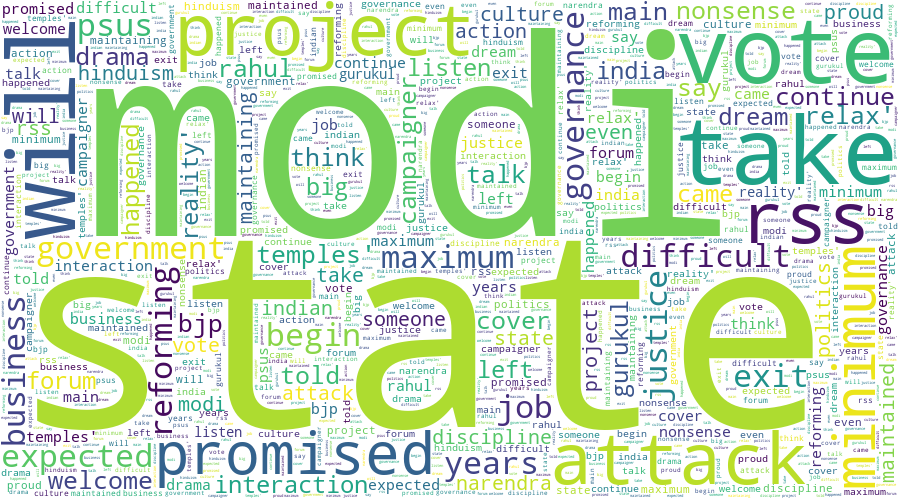

<Figure size 1200x640 with 0 Axes>

In [14]:
# Wordcloud para todos los twits
plt.figure(figsize=(15, 8), dpi=80)
create_wordcloud(df['clean_text'].values,"all.png")

Word Cloud Saved Successfully


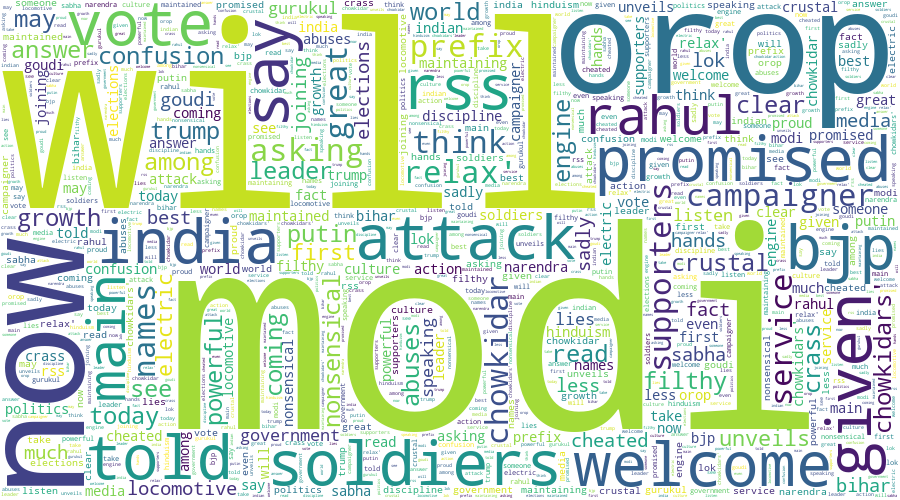

<Figure size 1200x640 with 0 Axes>

In [15]:
# Wordcloud para los twits positivos
plt.figure(figsize=(15, 8), dpi=80)
create_wordcloud(df_positive['clean_text'].values,"positive.png")

Word Cloud Saved Successfully


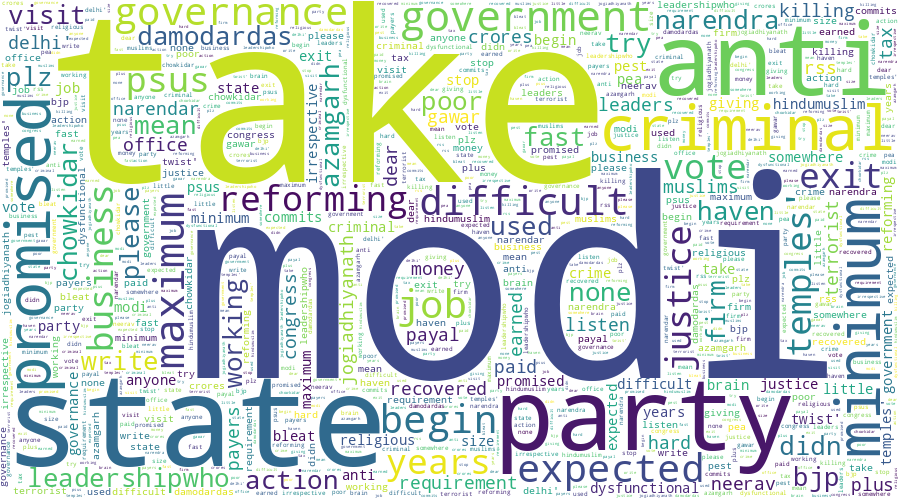

<Figure size 1200x640 with 0 Axes>

In [11]:
# Wordcloud solo para twits negativos
plt.figure(figsize=(15, 8), dpi=80)
create_wordcloud(df_negative['clean_text'].values,"negative.png")

Word Cloud Saved Successfully


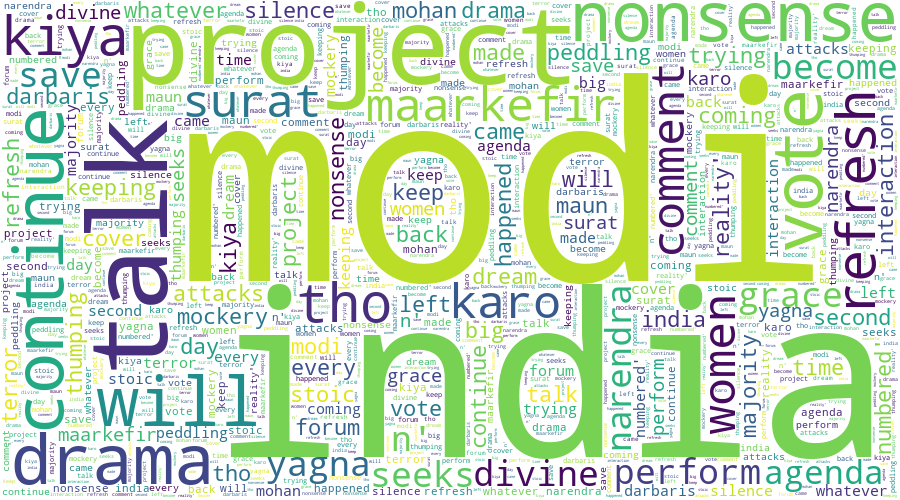

<Figure size 1200x640 with 0 Axes>

In [16]:
# Wordcloud solo para twits neutrales
plt.figure(figsize=(15, 8), dpi=80)
create_wordcloud(df_neutral['clean_text'].values,"neutral.png")

## Insights
<font color = "brown" size = 4><ul>
    <li>De todas estas nubes de palabras de diferentes clases, podemos<font color = "red"><b>MODI</b></font> son las palabras comunes usadas</li>
    <li>De las nubes de palabras de sentimiento positivo, podemos ver que <font color = "red"><b>WELCOME, SOLDIERS</b></font> son las palabras más comunes usadas</li>
    <li>De las nubes de palabras de sentimientos negativos, podemos ver que <font color = "red"><b>ANTI, CRIMINAL, KILLING</b></font> son las palabras más comunes usadas</li>
    <li>De las nubes de palabras de sentimientos neutrales, podemos ver que<font color = "red"><b>INDIA, PROJECT,CONTINUE</b></font>son las palabras más comunes usadas </li>
    </ul>
</font>

<div style="background:#c72e57;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 4>5. Data Preprocessing</font></h4>
    </strong>
</div>


## Steps
<ul>
<font color = "brown" size = 4><li>Tokenization — convertir las sentencias en palabras</li>
<li>Eliminación de puntuación innecesaria, etiquetas</li>
<li>Eliminación de palabras vacías: palabras frecuentes como "el", "es", etc. que no tienen una semántica específica</li>
<li>Convertir todas las letras a minúsculas</li>
<li>Stemming: las palabras se reducen a una raíz eliminando la inflexión mediante la eliminación de caracteres innecesarios, generalmente un sufijo.</li><br></font>
<font color = "red" size = 4>La forma derivada de los estudios es: <b>studi</b><br>
La forma derivada de estudiar es: <b>study</b>     
    
</font>
</ul>
    

In [17]:
# Derivación
ps = PorterStemmer()
# Inicializa las listas
corpus = []
words = []
for i in range(0, len(df)):
    # Eliminar caracteres que no sean letras
    review = re.sub('[^a-zA-Z]', ' ', str(df["clean_text"][i]))
    # Bajando de mayúsculas todo el texto
    review = review.lower()
    # Dividir en palabras
    review = review.split()
    # Aplicación de derivación
    stemmed = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    # Uniendo palabras
    review = ' '.join(stemmed)
    # Agregar todos los tweets a una lista después del preprocesamiento
    corpus.append(review)
    # Agregar todas las palabras para incrustaciones de palabras
    words.append(stemmed)

In [18]:
# Ejemplo del cuerpo
corpus[1:10]

['talk nonsens continu drama vote modi',
 'say vote modi welcom bjp told rahul main campaign modi think modi relax',
 'ask support prefix chowkidar name modi great servic confus read crustal clear crass filthi nonsens see abus come chowkidar',
 'answer among power world leader today trump putin modi may',
 'kiya tho refresh maarkefir comment karo',
 'surat women perform yagna seek divin grace narendra modi becom',
 'come cabinet scholar like modi smriti hema time introspect',
 'upcom elect india saga go import pair look current modi lead govt elect deal brexit combin weekli look juici bear imho',
 'gandhi gay modi']

In [19]:
# Length 
print("Legth of Corpus:",len(corpus))

Legth of Corpus: 162980


In [20]:
# Updating created corpus in our dataframe
df["clean_text"] = corpus

In [21]:
# Dropping NA Values and resetting index
df = df.dropna()
df = df.reset_index()

In [22]:
# Checking for NA Values after corpus updations
df.isna().sum()

index         0
clean_text    0
category      0
dtype: int64

In [23]:
# Exportación de oraciones derivadas
df[["clean_text","category"]].to_csv("stemmed.csv",index = False)

In [24]:
# Cargando las oraciones derivadas
df_stemmed = pd.read_csv("stemmed.csv")
# Extrajendo corpus
corpus = list(df_stemmed["clean_text"])

<div style="background:#c72e57;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 4>6. Feature Extraction</font></h4>
    </strong>
</div>


<font color = "brown" size = 4>En el procesamiento de textos, las palabras del texto representan características discretas y categóricas. ¿Cómo codificamos dichos datos de manera que estén listos para ser utilizados por los algoritmos? El mapeo de datos textuales a vectores de valores reales se denomina extracción de características. Una de las técnicas más simples para representar numéricamente texto es Bag of Words & TFIDF Vectorizer.<br><font>
## Bolsa de Palabras (BOW) o Vectorizador de Conteo: 
<font color = "brown" size = 4>Hacemos la lista de palabras únicas en el corpus de texto llamado vocabulario. Luego podemos representar cada oración o documento como un vector con cada palabra representada como 1 para presente y 0 para ausente del vocabulario.</font>
## TF-IDF Vectorizer: 
<font color = "brown" size = 4>Aquí, utilizo el vectorizador TF-IDF para la vectorización. El algoritmo Frecuencia de término y Frecuencia de documento inversa.<br><ul><li>Frecuencia de término (TF) = (Número de veces que aparece el término t en un documento)/(Número de términos del documento)</li><br><li>Frecuencia inversa de documentos (IDF) = log(N/n), donde N es el número de documentos y n es el número de documentos en los que ha aparecido un término t. El IDF de una palabra rara es alto, mientras que el IDF de un Es probable que la palabra frecuente sea baja. Teniendo así el efecto de resaltar palabras que son distintas.</li><br><li>Podemos calcular el valor TF-IDF de un término como = TF * IDF</li>
    </ul></font>

In [25]:
# Aplicamos TFIDF Vectorization
tfidf = TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X_tfidf = tfidf.fit_transform(df["clean_text"]).toarray()

In [26]:
# Variable independiente
X = df_stemmed["clean_text"]
# Varible dependiente
Y=df_stemmed["category"]

In [27]:
df_tfidf = pd.DataFrame(X_tfidf,columns = tfidf.get_feature_names())
df_tfidf["output"] = Y
df_tfidf.head()


,aadhaar,aadhar,aaj,aam,aap,aayega,aayog,abdullah,abe,abhi,...,youngster,your,youth,youtub,youv,yr,yr modi,zee,zero,output
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<div style="background:#c72e57;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 4>7. Data Modelling</font></h4>
    </strong>
</div>


In [29]:
# Train test Split
X_train_tfidf,X_test_tfidf,Y_train_tfidf,Y_test_tfidf = train_test_split(X_tfidf,Y,test_size=0.33,random_state = 27)

### Multinomial Naive Bayes

In [30]:
# Initializing Model
classfier_tfidf = MultinomialNB(alpha=0.1)
# Fitting data
classfier_tfidf.fit(X_train_tfidf,Y_train_tfidf)
# Prediction on test data
Y_pred_tfidf = classfier_tfidf.predict(X_test_tfidf)

### Logistic Regression

In [31]:
# Initializing Model
logistic_tfidf = LogisticRegression(solver='liblinear')
# Fitting data
logistic_tfidf.fit(X_train_tfidf,Y_train_tfidf)
# Prediction on test data
Y_pred_logistic_tfidf = logistic_tfidf.predict(X_test_tfidf)

<div style="background:#c72e57;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 4>8. Evaluation Metrics</font></h4>
    </strong>
</div>


In [32]:
acc_log_tfidf = accuracy_score(Y_test_tfidf,Y_pred_logistic_tfidf)
classification_log_tfidf = classification_report(Y_test_tfidf,Y_pred_logistic_tfidf)
confusion_matrix_log_tfidf = confusion_matrix(Y_test_tfidf,Y_pred_logistic_tfidf)

In [33]:
print("For Logistic Regression: \n")
print(" \n Accuracy : ",acc_log_tfidf,"\n","Classification report \n",classification_log_tfidf,"\n","Confusion matrix \n",confusion_matrix_log_tfidf)

For Logistic Regression: 

 
 Accuracy :  0.8337176006842438 
 Classification report 
               precision    recall  f1-score   support

        -1.0       0.82      0.68      0.75     11708
         0.0       0.80      0.91      0.85     18192
         1.0       0.87      0.85      0.86     23882

    accuracy                           0.83     53782
   macro avg       0.83      0.81      0.82     53782
weighted avg       0.84      0.83      0.83     53782
 
 Confusion matrix 
 [[ 8019  1765  1924]
 [  560 16593  1039]
 [ 1226  2429 20227]]


<font color = "brown" size = 4><b>For Logistic Regression, we get 83% Accuracy with liblinear as a solver></b></font> 

In [30]:
acc_tfidf = accuracy_score(Y_test_tfidf,Y_pred_tfidf)
classification_tfidf = classification_report(Y_test_tfidf,Y_pred_tfidf)
confusion_matrix_tfidf = confusion_matrix(Y_test_tfidf,Y_pred_tfidf)

In [31]:
print("For Mutinomial Naive Bayes: \n")
print(" \n Accuracy : ",acc_tfidf,"\n","Classification report \n",classification_tfidf,"\n","Confusion matrix \n",confusion_matrix_tfidf)

For Mutinomial Naive Bayes: 

 
 Accuracy :  0.7082295191699826 
 Classification report 
               precision    recall  f1-score   support

        -1.0       0.77      0.46      0.58     11708
         0.0       0.77      0.65      0.70     18192
         1.0       0.67      0.87      0.75     23882

    accuracy                           0.71     53782
   macro avg       0.73      0.66      0.68     53782
weighted avg       0.72      0.71      0.70     53782
 
 Confusion matrix 
 [[ 5425  1567  4716]
 [  579 11855  5758]
 [ 1049  2023 20810]]


<font color = "brown" size = 4><b>For Mutinomail NB, we get 70% Accuracy with alpha = 0.1</b></font> 

<div style="background:#c72e57;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 4>9. Sequential Modelling</font></h4>
    </strong>
</div>


<font color = "brown" size = 4>El modelado de secuencias es una técnica en la que una red neuronal toma una cantidad variable de datos de secuencias y genera una cantidad variable de predicciones. La entrada normalmente se envía a una red neuronal recurrente (RNN).<br><br>
En teoría, los RNN son bastante capaces de manejar tales "dependencias a largo plazo". Un ser humano podría elegir cuidadosamente los parámetros para resolver problemas de juguetes de esta manera. Desafortunadamente, en la práctica, los RNN no parecen poder aprenderlos. <br><br>
Los LSTM pueden resolver el problema aquí<br><br>
Los LSTM están diseñados explícitamente para evitar el problema de la dependencia a largo plazo. Recordar información durante largos períodos de tiempo es prácticamente su comportamiento predeterminado, ¡no es algo que les cueste aprender!<br><br>
Los LSTM también tienen esta estructura similar a una cadena, pero el módulo repetidor tiene una estructura diferente. En lugar de tener una sola capa de red neuronal, hay cuatro que interactúan de una manera muy especial.<br><br><br>
    <img src = "https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png"><font>

In [34]:
# Clonamos los twits
messages=X.copy()

In [35]:
# Configuración de parámetros para relleno y modelado secuencial
voc_size = 5000
embedding_vector_features = 200
sent_length = 200
lstm_out = 128

In [36]:
# Tokenization of all words in the vocabulary for all tweets
onehot_repr=[one_hot(words,voc_size)for words in df["clean_text"]]
onehot_repr[1:3]

[[1994, 1641, 269, 4887, 4266, 420],
 [2965, 4266, 420, 3793, 4185, 4658, 1988, 2651, 4485, 420, 667, 420, 4705]]

In [37]:
# Applying Post Padding
embedded_docs=pad_sequences(onehot_repr,padding='post',maxlen=sent_length)
print(embedded_docs)

[[ 420 3923 2938 ...    0    0    0]
 [1994 1641  269 ...    0    0    0]
 [2965 4266  420 ...    0    0    0]
 ...
 [2434 4983 3819 ...    0    0    0]
 [1018  794 4700 ...    0    0    0]
 [3488 2012 4577 ...    0    0    0]]


In [38]:
# Changing Negative values to positive
Y = [2 if x == -1 else x for x in Y]

# Converting list to arrays
X_final=np.array(embedded_docs)
y_final=np.array(Y)

In [39]:
# Shape of X,Y
X_final.shape,y_final.shape

((162973, 200), (162973,))

In [40]:
# Train Test Split
X_train_embed, X_test_embed, Y_train_embed, Y_test_embed = train_test_split(X_final, y_final, test_size=0.33, random_state=27)

In [41]:
# Sequential Model
model = Sequential()

# Input layer
model.add(Input(shape=(None,)))

# Embedding layer
model.add(Embedding(voc_size, embedding_vector_features, input_length = sent_length))

# LSTM layer
model.add(Bidirectional(LSTM(lstm_out, dropout=0.2)))

# Fully connected layer
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation = 'relu'))

# Output layer
model.add(Dense(3, activation = 'softmax'))

# model.summary()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 200)         1000000   
                                                                 
 bidirectional (Bidirectiona  (None, 256)              336896    
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                        

In [42]:
# Compling model and running
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(X_train_embed,Y_train_embed,validation_data=(X_test_embed,Y_test_embed),
                    epochs=2, batch_size=256,
                    verbose=1,shuffle=True)

Epoch 1/2
427/427 [==============================] - 2931s 7s/step - loss: 0.6873 - accuracy: 0.7126 - val_loss: 0.5570 - val_accuracy: 0.7838
Epoch 2/2
427/427 [==============================] - 2829s 7s/step - loss: 0.5435 - accuracy: 0.7900 - val_loss: 0.5442 - val_accuracy: 0.7867


<div style="background:#c72e57;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 4>10. Predictions</font></h4>
    </strong>
</div>


In [43]:
predictions = model.predict(X_test_embed)
print(history.history)

{'loss': [0.6873258948326111, 0.543489933013916], 'accuracy': [0.7125862240791321, 0.789955198764801], 'val_loss': [0.5569506287574768, 0.5442320704460144], 'val_accuracy': [0.783756673336029, 0.7866944074630737]}
